In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import sys

In [2]:
#modelling a road netwok of cities in india
#the graph we consider here is undirected beacause between two cities the road can be two ways
#so,we use nx.graph().if making a directed graph,use nx.DiGraph()
G=nx.Graph()

In [3]:
#let's create a list city set withnames of cities
city_set=['Delhi','Hyd','Mumbai','pune','vizag','jaipur','surat','kolkata','chennai','bangalore']
for each in city_set:
    G.add_node(each)

In [4]:
G.nodes()

NodeView(('Delhi', 'Hyd', 'Mumbai', 'pune', 'vizag', 'jaipur', 'surat', 'kolkata', 'chennai', 'bangalore'))

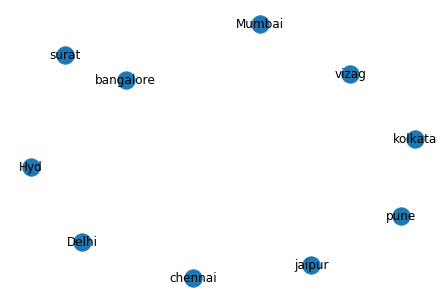

In [5]:
nx.draw(G,with_labels=1)
plt.show()

In [6]:
#generally,to fix cost we consider weights of the edges.here we randomly add the edges
costs=[]
value=100
while(value<=2000):
    costs.append(value)
    value=value+100
print(costs)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


In [7]:
#we add 16 edges to the network
while(G.number_of_edges()<5):
    c1=random.choice(list(G.nodes()))
    c2=random.choice(list(G.nodes()))
    if c1!=c2 and G.has_edge(c1,c2)==0:
        w=random.choice(costs)
        G.add_edge(c1,c2,weight=w)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


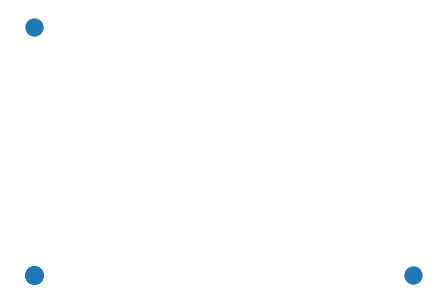

In [8]:

pos=nx.spectral_layout(G)
nx.draw(G,pos)

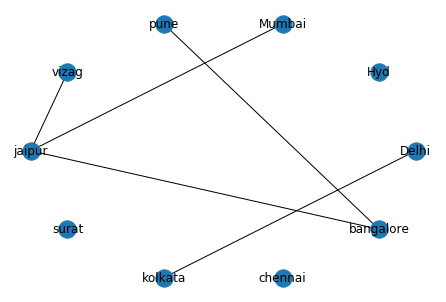

In [9]:
pos=nx.circular_layout(G)
nx.draw(G,pos,with_labels=True)
#nx.draw_networkx_edge_labels(G,pos)

In [10]:
print(nx.is_connected(G))

False


In [11]:
for u in list(G.nodes):
    for v in list(G.nodes):
        print (u,v,nx.has_path(G,u,v))

Delhi Delhi True
Delhi Hyd False
Delhi Mumbai False
Delhi pune False
Delhi vizag False
Delhi jaipur False
Delhi surat False
Delhi kolkata True
Delhi chennai False
Delhi bangalore False
Hyd Delhi False
Hyd Hyd True
Hyd Mumbai False
Hyd pune False
Hyd vizag False
Hyd jaipur False
Hyd surat False
Hyd kolkata False
Hyd chennai False
Hyd bangalore False
Mumbai Delhi False
Mumbai Hyd False
Mumbai Mumbai True
Mumbai pune True
Mumbai vizag True
Mumbai jaipur True
Mumbai surat False
Mumbai kolkata False
Mumbai chennai False
Mumbai bangalore True
pune Delhi False
pune Hyd False
pune Mumbai True
pune pune True
pune vizag True
pune jaipur True
pune surat False
pune kolkata False
pune chennai False
pune bangalore True
vizag Delhi False
vizag Hyd False
vizag Mumbai True
vizag pune True
vizag vizag True
vizag jaipur True
vizag surat False
vizag kolkata False
vizag chennai False
vizag bangalore True
jaipur Delhi False
jaipur Hyd False
jaipur Mumbai True
jaipur pune True
jaipur vizag True
jaipur jaipur

In [12]:
def create_network(city_set,costs,num_edges):
    G=nx.Graph()
    for each in city_set:
        G.add_node(each)
    while(G.number_of_edges()<5):
        c1=random.choice(list(G.nodes()))
        c2=random.choice(list(G.nodes()))
        if c1!=c2 and G.has_edge(c1,c2)==0:
            w=random.choice(costs)
            G.add_edge(c1,c2,weight=w)
        return G
G=create_network(city_set,costs,4)

In [13]:
def add_random_edge(G,costs):
        c1=random.choice(list(G.nodes()))
        c2=random.choice(list(G.nodes()))
        if c1!=c2 and G.has_edge(c1,c2)==0:
            w=random.choice(costs)
            G.add_edge(c1,c2,weight=w)
    

In [14]:
try:
    l=(nx.dijkstra_path(G,'chennai','jaipur'))
except:
    l=1000000
print(l)

1000000


In [15]:
x=[0]
y=[l]

In [16]:
for t in range(1,10000):
    add_random_edge(G,costs)
    x.append(t)
    try:
        l=nx.dijkstra_path_length(G,'chennai','jaipur')
        y.append(l)
        break
    except:
        l=10000
        y.append(l)
        print('no path')
    

no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path
no path


plotting


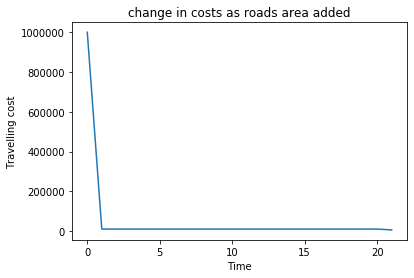

In [17]:
print('plotting')
plt.xlabel('Time')
plt.ylabel('Travelling cost')
plt.title('change in costs as roads area added')
plt.plot(x,y)
plt.show()
 

In [20]:
P=nx.Graph()
P.add_edges_from([(1,2),(3,4),(5,6),(7,8),(2,8),(4,6)])
G.remove_edges_from([(1,2),(3,4),(5,6)])
print(len(G.nodes()))

10
